In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
#Upload the Dataset
Dtime=pd.read_csv("D:\CSV FIles Path\Assignments\Simple Linear Regression\delivery_time.csv")
Dtime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
Dtime.shape

(21, 2)

In [4]:
Dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
Dtime.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
#Identify the Duplicate Value if Any
Dtime.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [7]:
#Identify the Duplicate ROW if Any
Dtime[Dtime.duplicated()]

,Delivery Time,Sorting Time


C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

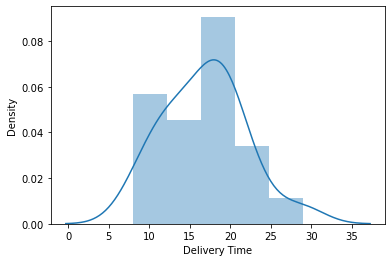

In [8]:
# Visualise DATA to check for Outliers and Distribution pattern
sns.distplot(Dtime['Delivery Time'])

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

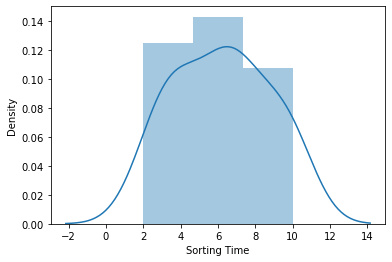

In [9]:
sns.distplot(Dtime['Sorting Time'])

<AxesSubplot:>

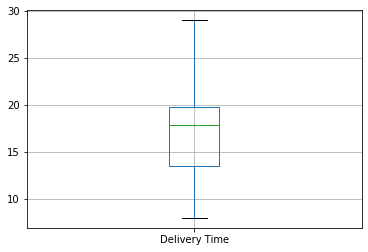

In [10]:
Dtime.boxplot(column=['Delivery Time'])

In [11]:
# Rename the Column to Remove Space and then Create a Regression Model
Dtime=Dtime.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
Dtime

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
#Import Regression Library
import statsmodels.formula.api as smf

In [13]:
#Build Simple Linear Regression Model
model = smf.ols("Delivery_Time~Sorting_Time",data = Dtime).fit()

In [14]:
#Correlation Analysis of Dependent and Independent Variable.
Dtime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


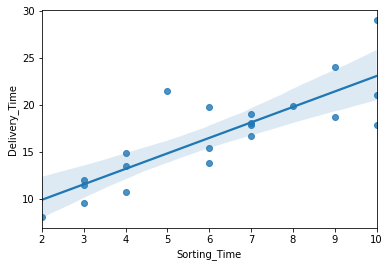

In [15]:
#Build Plot to check the CORRELATION
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=Dtime);

In [16]:
# Identify the Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [17]:
# Finding #t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [18]:
# Find the Accuracy of Regression Equation by USING R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## More than 0.65 is an Average Regression Value

## Lets check whether the Independent Variable is Normally distributed



## Define FUNCTION to Visualise and transform Data

In [19]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt)
    plt.show()

## Q-Q Plot, Will help us to Visualize the distribution pattern


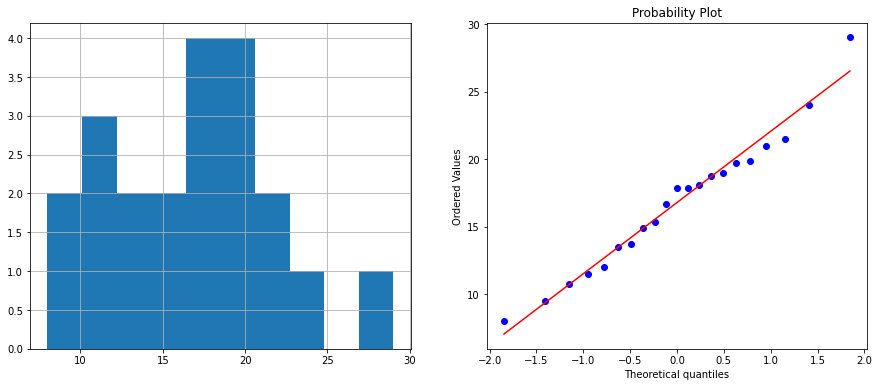

In [20]:
diagnostic_plots(Dtime,'Delivery_Time')

## Apply Logarithmic Transformation.

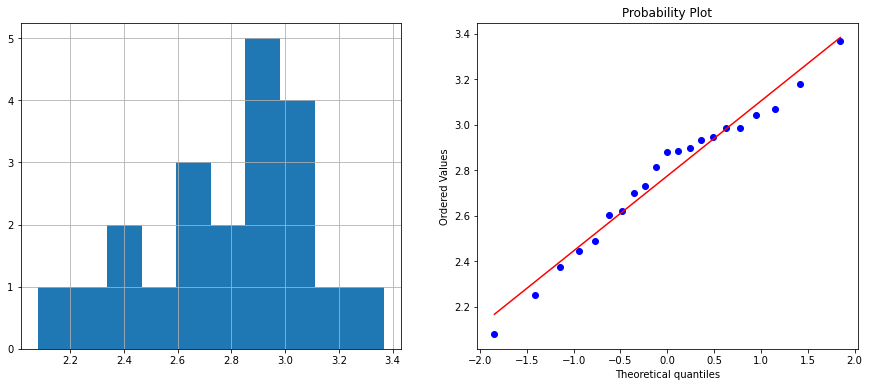

In [21]:
Dtime['Log_DT']=np.log(Dtime['Delivery_Time'])
diagnostic_plots(Dtime,'Log_DT')

## Lets Build another MODEL, using the variable derived from Logarithmic Transformation.

In [22]:
#Build Simple Linear Regression Model2
mode2 = smf.ols("Log_DT~Sorting_Time",data = Dtime).fit()

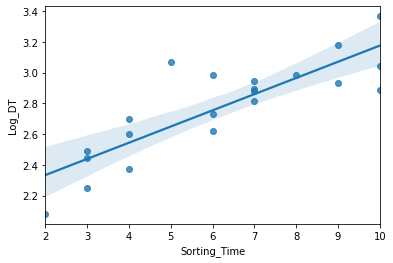

In [23]:
#Build Plot to check the CORRELATION
sns.regplot(x="Sorting_Time", y="Log_DT", data=Dtime);

In [24]:
# Identify the Coefficients
mode2.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [25]:
# Find the Accuracy of Regression Equation by USING R squared values
(mode2.rsquared,mode2.rsquared_adj)

(0.7109478980584187, 0.6957346295351776)

## R Squared Value has improved to some extent. Lets check if this can be further improved.

## Q-Q plot, Once again.

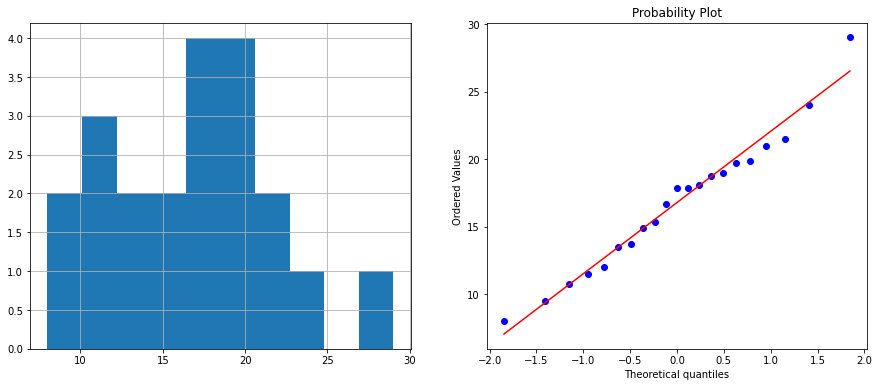

In [26]:
diagnostic_plots(Dtime,'Delivery_Time')

## Apply Sqaure Root  Transformation.

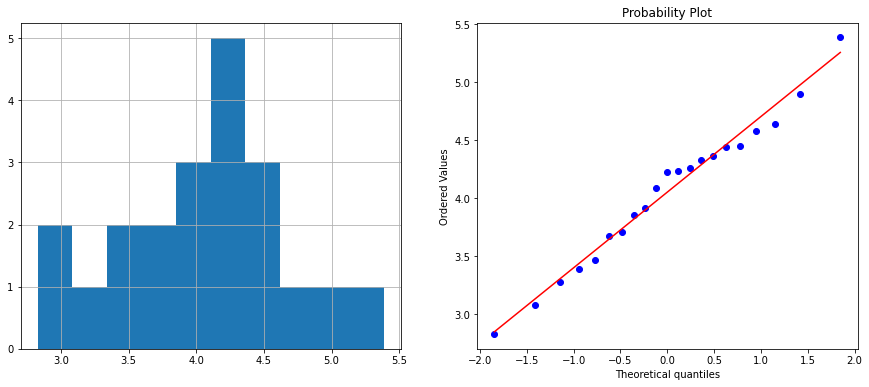

In [27]:
Dtime['sqr_DT']=Dtime['Delivery_Time']**(1/2)
diagnostic_plots(Dtime,'sqr_DT')

## Another MODEL, using the variable derived from Square Root Transformation

In [28]:
#Build Simple Linear Regression Model3
mode3 = smf.ols("sqr_DT~Sorting_Time",data = Dtime).fit()

In [29]:
mode3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sqr_DT   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.00e-06
Time:                        10:53:32   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

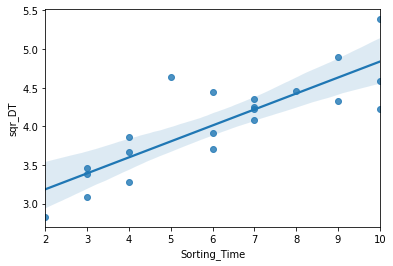

In [30]:
#Build Plot to check the CORRELATION
sns.regplot(x="Sorting_Time", y="sqr_DT", data=Dtime);

In [31]:
# Identify the Coefficients
mode3.params

Intercept       2.772731
Sorting_Time    0.206632
dtype: float64

In [32]:
# Find the Accuracy of Regression Equation by USING R squared values
(mode3.rsquared,mode3.rsquared_adj)

(0.704049871541756, 0.6884735489913221)

## Another MODEL, using the variable derived from Exponential  Transformation.

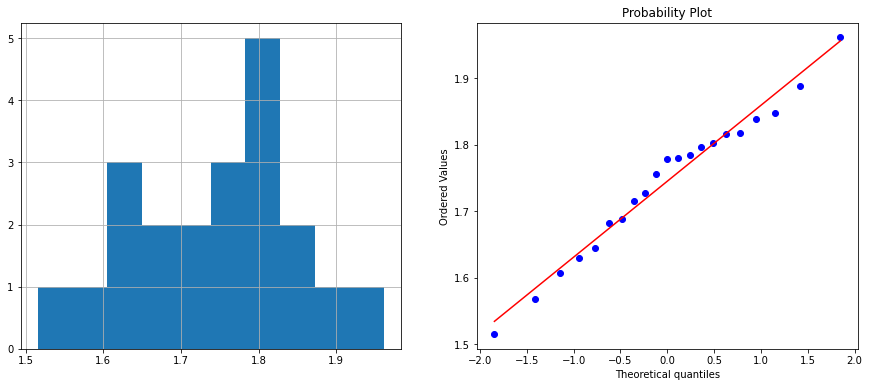

In [33]:
Dtime['Exp_DT']=Dtime['Delivery_Time']**(1/5)
diagnostic_plots(Dtime,'Exp_DT')

In [34]:
#Build Simple Linear Regression Model4
mode4 = smf.ols("Exp_DT~Sorting_Time",data = Dtime).fit()

In [35]:
mode4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exp_DT   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     46.52
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.64e-06
Time:                        10:53:33   Log-Likelihood:                 30.125
No. Observations:                  21   AIC:                            -56.25
Df Residuals:                      19   BIC:                            -54.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5201      0.036     42.759      0.000       1.446       1.595
Sorting_Time     0.0364      0.005      6.821      0.000       0.025       0.048
==============================================================================
Omnibus:                        1.609   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                0.792
Skew:                           0.474   Prob(JB):                        0.673
Kurtosis:                       3.086   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare all the models to find the best fit MODEL to apply SLR algorithm

In [36]:
# Find the Accuracy of Regression Equation by USING R squared values
print(model.rsquared,model.rsquared_adj)
print(mode2.rsquared,mode3.rsquared_adj)
print(mode3.rsquared,mode3.rsquared_adj)
print(mode4.rsquared,mode3.rsquared_adj)

0.6822714748417231 0.6655489208860244
0.7109478980584187 0.6884735489913221
0.704049871541756 0.6884735489913221
0.7100148134529496 0.6884735489913221


## MODE 2, seems to be better than all the other models comparitively, hence we will USE MODE 2 for Prediction.

In [37]:
#Prediction for New Delivery Time if the Sorting Time  is 10 or  15
newDtime=pd.Series([10,15])
newDtime

0    10
1    15
dtype: int64

In [38]:
#Displaying the NEW DATA Point in a Dataframe
newDtime1=pd.DataFrame(newDtime,columns=['Sorting_Time'])
newDtime1

,Sorting_Time
0,10
1,15


In [40]:
#Predicting New Delivery Time
mode2.predict(newDtime1)
mode2

In [44]:
# Fitting the New Predicted Value in the Original DATASET
Dtime['DT Prediction']=mode2.fittedvalues
Dtime

,Delivery_Time,Sorting_Time,DT Prediction
0,21.00,10,3.176888
1,13.50,4,2.543578
2,19.75,6,2.754681
3,24.00,9,3.071336
4,29.00,10,3.176888
5,15.35,6,2.754681
6,19.00,7,2.860233
7,9.50,3,2.438027
8,17.90,10,3.176888
9,18.75,9,3.071336


In [45]:
# RUN Prediction Model  for New DATA Point
newDtime1['DT Prediction']=mode2.predict(Dtime)
newDtime1

,Sorting_Time,DT Prediction
0,10,3.176888
1,15,2.543578


In [46]:
mode2.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [47]:
# Manually Calculating the Predicted value
2.226678+(0.098766*10)

3.214338

In [48]:
2.226678+(0.098766*15)

3.7081680000000006